# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/udacity/share/traffic_sign_data/train.p'
testing_file = '/home/udacity/share/traffic_sign_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X Train size:", X_train.shape)
print("Y Train size:", y_train.shape)
print("X Test size:", X_test.shape)
print("Y Test size:", y_test.shape)

X Train size: (39209, 32, 32, 3)
Y Train size: (39209,)
X Test size: (12630, 32, 32, 3)
Y Test size: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

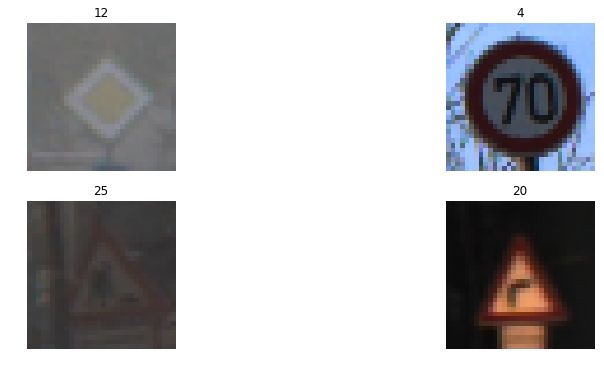

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,2, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

[]

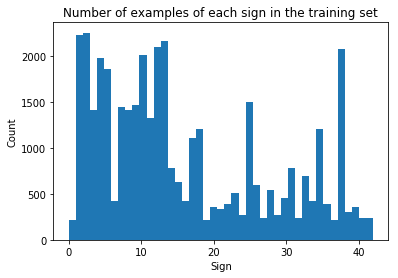

In [4]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

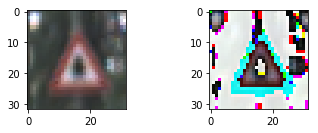

In [5]:
# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

X_train_orig = X_train
X_test_orig = X_test

# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""
    plt.subplot(2,2,1)
    plt.imshow(X_train_orig[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_train[image_index])
    
    
plot_norm_image(20)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [6]:
"""### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)"""

"### Preprocess the data here.\n### Feel free to use as many code cells as needed.\n\n# Convert to grayscale\nX_train_rgb = X_train\nX_train_gry = np.sum(X_train/3, axis=3, keepdims=True)\n\nX_test_rgb = X_test\nX_test_gry = np.sum(X_test/3, axis=3, keepdims=True)\n\nprint('RGB shape:', X_train_rgb.shape)\nprint('Grayscale shape:', X_train_gry.shape)"

In [7]:
"""X_train = X_train_gry
X_test = X_test_gry

print('done')"""

"X_train = X_train_gry\nX_test = X_test_gry\n\nprint('done')"

In [8]:
"""# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')"""

"# Visualize rgb vs grayscale\nn_rows = 8\nn_cols = 10\noffset = 9000\nfig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))\nfig.subplots_adjust(hspace = .1, wspace=.001)\naxs = axs.ravel()\nfor j in range(0,n_rows,2):\n    for i in range(n_cols):\n        index = i + j*n_cols\n        image = X_train_rgb[index + offset]\n        axs[index].axis('off')\n        axs[index].imshow(image)\n    for i in range(n_cols):\n        index = i + j*n_cols + n_cols \n        image = X_train_gry[index + offset - n_cols].squeeze()\n        axs[index].axis('off')\n        axs[index].imshow(image, cmap='gray')"

In [9]:
"""## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))"""

'## Normalize the train and test datasets to (-1,1)\n\nX_train_normalized = (X_train - 128)/128 \nX_test_normalized = (X_test - 128)/128\n\nprint(np.mean(X_train_normalized))\nprint(np.mean(X_test_normalized))'

In [10]:
"""print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')"""

'print("Original shape:", X_train.shape)\nprint("Normalized shape:", X_train_normalized.shape)\nfig, axs = plt.subplots(1,2, figsize=(10, 3))\naxs = axs.ravel()\n\naxs[0].axis(\'off\')\naxs[0].set_title(\'normalized\')\naxs[0].imshow(X_train_normalized[0].squeeze(), cmap=\'gray\')\n\naxs[1].axis(\'off\')\naxs[1].set_title(\'original\')\naxs[1].imshow(X_train[0].squeeze(), cmap=\'gray\')'

### Split Data into Training, Validation and Testing Sets

In [11]:
"""### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done shuffling dataset')

## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))"""

'### Split the data into training/validation/testing sets here.\n### Feel free to use as many code cells as needed.\n\n## Shuffle the training dataset\n\nfrom sklearn.utils import shuffle\n\nX_train_normalized, y_train = shuffle(X_train_normalized, y_train)\n\nprint(\'done shuffling dataset\')\n\n## Split validation dataset off from training dataset\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, \n                                                                test_size=0.20, random_state=42)\n\nprint("Old X_train size:",len(X_train_normalized))\nprint("New X_train size:",len(X_train))\nprint("X_validation size:",len(X_validation))'

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import time
import pandas as pd
# Network parameters
n_input = 32 * 32 * 3
nb_filters = 32
kernel_size = (3, 3)
input_shape = (32, 32, 3)
n_fc1 = 512
n_fc2 = 128
in_channels = 3
pool_size = 2 # i.e. (2,2)

dropout_conv = 0.9
dropout_fc = 0.9

weights_stddev = 0.1
weights_mean = 0.0
biases_mean = 0.0

padding = 'VALID'
if padding == 'SAME':
    conv_output_length = 6
elif padding == 'VALID':
    conv_output_length = 5
else:
    raiseException("Unknown padding.")

In [13]:
# tf Graph input
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened

y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value=1., off_value=0., axis=-1)

In [14]:
## Create model

def conv2d(x, W, b, strides=3):
    """Conv2D wrapper, with bias and relu activation"""
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2, padding_setting='SAME'):
    """MaxPool2D wrapper."""
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding=padding_setting)

def conv_net(model_x, model_weights, model_biases, model_pool_size, 
             model_dropout_conv, model_dropout_fc, padding='SAME'):
    """Convolutional neural network model."""
    # Convolution Layer 1
    conv1 = conv2d(model_x, model_weights['conv1'], model_biases['conv1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=model_pool_size, padding_setting=padding)
    conv1 = tf.nn.dropout(conv1, model_dropout_conv)

    # Fully connected layer 1
    # Reshape conv1 output to fit fully connected layer input
    conv1_shape = conv1.get_shape().as_list()
    fc1 = tf.reshape(conv1, [-1, conv1_shape[1]*conv1_shape[2]*conv1_shape[3]])
    fc1 = tf.add(tf.matmul(fc1, model_weights['fc1']), model_biases['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, model_dropout_fc)
    # Fully connected layer 2
    fc2 = tf.add(tf.matmul(fc1, model_weights['fc2']), model_biases['fc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, model_dropout_fc)
    # Output layer
    output = tf.add(tf.matmul(fc2, model_weights['out']), model_biases['out'])
    # Note: Softmax is outside the model
    return output


## Store layers weight & bias

# NEW: initialise neurons with slightly positive initial bias
# to avoid dead neurons.
def weight_variable(shape, weight_mean, weight_stddev):
    initial = tf.truncated_normal(shape, stddev=weight_stddev, mean=weight_mean)
    # alt: tf.random_normal(shape)
    return tf.Variable(initial)


def bias_variable(shape, bias_mean):
    initial = tf.constant(bias_mean, shape=shape)
    return tf.Variable(initial)


weights = {
    'conv1': weight_variable([kernel_size[0], kernel_size[1], in_channels, nb_filters], weights_mean, weights_stddev),
    'fc1': weight_variable([nb_filters * conv_output_length**2, n_fc1], weights_mean, weights_stddev),
    'fc2': weight_variable([n_fc1, n_fc2], weights_mean, weights_stddev),
    'out': weight_variable([n_fc2, n_classes], weights_mean, weights_stddev)
}

biases = {
    'conv1': bias_variable([nb_filters], biases_mean),
    'fc1': bias_variable([n_fc1], biases_mean),
    'fc2': bias_variable([n_fc2], biases_mean),
    'out': bias_variable([n_classes], biases_mean)
}

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [15]:
# Training parameters
learning_rate = 0.001
initial_learning_rate = learning_rate
training_epochs = 150
batch_size = 100
display_step = 1
n_train = len(X_train)

anneal_mod_frequency = 15
# Annealing rate of 1: learning rate remains constant.
annealing_rate = 1

print_accuracy_mod_frequency = 1

# Construct model
pred = conv_net(x, weights, biases, pool_size, dropout_conv, dropout_fc, padding=padding)
pred_probs = tf.nn.softmax(pred)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Function to initialise the variables
init = tf.initialize_all_variables()

### RUN MODEL ###
# Launch the graph
sess = tf.Session()

# Initialise variables
sess.run(init)

# Initialise time logs
init_time = time.time()
epoch_time = init_time

five_epoch_moving_average = 0.
epoch_accuracies = []

# Training cycle
for epoch in range(training_epochs):
    if five_epoch_moving_average > 0.96:
        break
        
    avg_cost = 0.

    total_batch = int(n_train / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = np.array(X_train[i * batch_size:(i + 1) * batch_size]), \
                           np.array(y_train[i * batch_size:(i + 1) * batch_size])
        # tf.train.batch([X_train, y_train], batch_size=100, enqueue_many=True)
        
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
        # print(avg_cost)
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "cost=",
              "{:.9f}".format(avg_cost))
        last_epoch_time = epoch_time
        epoch_time = time.time()
        # print("Time since last epoch: ", epoch_time - last_epoch_time)
    # Anneal learning rate
    if (epoch + 1) % anneal_mod_frequency == 0:
        learning_rate *= annealing_rate
        print("New learning rate: ", learning_rate)

    if (epoch + 1) % print_accuracy_mod_frequency == 0:
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        # Line below needed only when not using `with tf.Session() as sess`
        with sess.as_default():
            epoch_accuracy = accuracy.eval({x_unflattened: X_val, y_rawlabels: y_val})
            # TODO: optimise five_epoch_moving_average, e.g. using a queue            
            epoch_accuracies.append(epoch_accuracy)
            if epoch >= 4:
                five_epoch_moving_average = np.sum(epoch_accuracies[epoch-5:epoch]) / 5
                print("Five epoch moving average: ", five_epoch_moving_average)
            print("Accuracy (validation):", epoch_accuracy)

print("Optimization Finished!")

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
# accuracy_train = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print("Accuracy (train):", accuracy_train.eval({x_unflattened: X_train, y_rawlabels: y_train}))
train_predict_time = time.time()
# print("Time to calculate accuracy on training set: ", train_predict_time - epoch_time)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# Line below needed only when not using `with tf.Session() as sess`
with sess.as_default():
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test, y_rawlabels: y_test}))
test_predict_time = time.time()
print("Time to calculate accuracy on test set: ", test_predict_time - train_predict_time)

# Print parameters for reference
print("\nParameters:")
print("Learning rate (initial): ", initial_learning_rate)
print("Anneal learning rate every ", anneal_mod_frequency, " epochs by ", 1 - annealing_rate)
print("Learning rate (final): ", learning_rate)
print("Training epochs: ", training_epochs)
print("Batch size: ", batch_size)
print("Dropout (conv): ", dropout_conv)
print("Dropout (fc): ", dropout_fc)
print("Padding: ", padding)
print("weights_mean: ", weights_mean)
print("weights_stddev: ", weights_stddev)
print("biases_mean: ", biases_mean)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 2.059318108
Accuracy (validation): 0.594364
Epoch: 0002 cost= 1.009866922
Accuracy (validation): 0.719077
Epoch: 0003 cost= 0.708373695
Accuracy (validation): 0.772507
Epoch: 0004 cost= 0.549009775
Accuracy (validation): 0.820964
Epoch: 0005 cost= 0.454576294
Five epoch moving average:  0.0
Accuracy (validation): 0.845575
Epoch: 0006 cost= 0.376946959
Five epoch moving average:  0.750497341156
Accuracy (validation): 0.866998
Epoch: 0007 cost= 0.314846010
Five epoch moving average:  0.805024242401
Accuracy (validation): 0.87618
Epoch: 0008 cost= 0.277755080
Five epoch moving average:  0.836444759369
Accuracy (validation): 0.883448
Epoch: 0009 cost= 0.244201550
Five epoch moving average:  0.858633041382
Accuracy (validation): 0.89467
Epoch: 0010 cost= 0.214829129
Five epoch moving average:  0.873374080658
Accuracy (validation): 0.899515
Epoch: 0011 cost= 0.190527900
Five epoch moving average:  0.8

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In [ ]:
# Close the current session.
sess.close()